# CL_s

Adapted from the pyhf starting tutorial (added plots, scans, etc)

Two bin counting experiment with a background uncertainty

In [1]:
import pyhf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Returning the observed and expected $\mathrm{CL}_{s}$

In [2]:
pdf = pyhf.simplemodels.hepdata_like(signal_data=[12.0, 11.0], bkg_data=[50.0, 52.0], bkg_uncerts=[3.0, 7.0])


CLs_obs, CLs_exp = pyhf.infer.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, test_stat="qtilde", return_expected=True)

print('Observed: {}, Expected: {}'.format(CLs_obs, CLs_exp))

Observed: 0.05251497423736956, Expected: 0.06445320535890459


Make a few tries!

- Turn off uncertainties
- Play with the expected signal and background yields
- Play with the observed data yields
- Plot observed and expected as a function of these

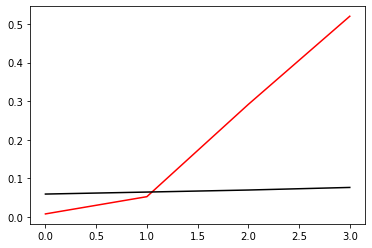

In [3]:
# For example...

CLs_obs=[]
CLs_exp=[]
fix, ax = plt.subplots(1,1)
for obs_data in [ [45, 40], [51, 48], [60, 55], [70, 65]   ]:
    pdf = pyhf.simplemodels.hepdata_like(signal_data=[12.0, 11.0], bkg_data=[50.0, 52.0], bkg_uncerts=[3.0, 7.0])
    iCLs_obs, iCLs_exp = pyhf.infer.hypotest(1.0, obs_data + pdf.config.auxdata, pdf,  test_stat="qtilde", return_expected=True)
    CLs_obs.append(iCLs_obs)
    CLs_exp.append(iCLs_exp)

plt.plot(list(range(0,len(CLs_obs))), CLs_obs, color="red", linestyle="solid")
plt.plot(list(range(0,len(CLs_exp))), CLs_exp, color="black", linestyle="solid")

Returning the observed $\mathrm{CL}_{s}$, $\mathrm{CL}_{s+b}$, **and** $\mathrm{CL}_{b}$

In [4]:
CLs_obs, p_values = pyhf.infer.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, test_stat="qtilde",  return_tail_probs=True)
print('Observed CL_s: {}, CL_sb: {}, CL_b: {}'.format(CLs_obs, p_values[0], p_values[1]))

Observed CL_s: 0.05251497423736956, CL_sb: 0.023325019427864607, CL_b: 0.4441593996111411


A reminder that 
$$
\mathrm{CL}_{s} = \frac{\mathrm{CL}_{s+b}}{\mathrm{CL}_{b}} = \frac{p_{s+b}}{1-p_{b}}
$$

Exercise: for the different tests you did above, plot CL_s, CL_sb, and CL_b

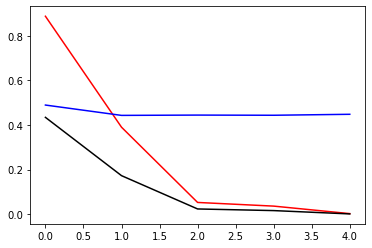

In [5]:
# For example...

CLs=[]
CLsb=[]
CLb=[]
fix, ax = plt.subplots(1,1)
for signal_data in [ [1.0, 0.5], [5.0, 4.8], [12.0, 11.0], [13.0, 12.0], [20.0, 17.0]   ]:
    pdf = pyhf.simplemodels.hepdata_like(signal_data=signal_data, bkg_data=[50.0, 52.0], bkg_uncerts=[3.0, 7.0])
    iCLs_obs, ip_values = pyhf.infer.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, test_stat="qtilde",  return_tail_probs=True)
    CLs.append(iCLs_obs)
    CLsb.append(ip_values[0])
    CLb.append(ip_values[1])

plt.plot(list(range(0,len(CLs))), CLs, color="red", linestyle="solid")
plt.plot(list(range(0,len(CLsb))), CLsb, color="black", linestyle="solid")
plt.plot(list(range(0,len(CLb))), CLb, color="blue", linestyle="solid")

In [6]:
assert CLs_obs == p_values[0]/p_values[1]

Returning the expected $\mathrm{CL}_{s}$ band values

In [7]:
import numpy as np

In [8]:
CLs_obs, CLs_exp_band = pyhf.infer.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf,  test_stat="qtilde", return_expected_set=True)
print('Observed CL_s: {}\n'.format(CLs_obs))
for p_value, n_sigma in enumerate(np.arange(-2,3)):
    print(p_value)
    print('Expected CL_s{}: {}'.format('      ' if n_sigma==0 else '({} σ)'.format(n_sigma),CLs_exp_band[p_value]))

Observed CL_s: 0.00244236222781897

0
Expected CL_s(-2 σ): 1.7873442528151073e-05
1
Expected CL_s(-1 σ): 0.0002653094542738306
2
Expected CL_s      : 0.0033661165802891485
3
Expected CL_s(1 σ): 0.03169900124726084
4
Expected CL_s(2 σ): 0.17971507788342778


Exercise: plot the evolution of the bands for increasing/decreasing background uncertainty (brazilian plot)

Text(0.5, 0, 'Different settings for background uncertainty')

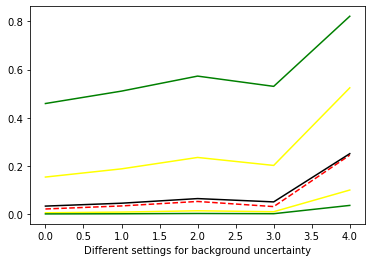

In [9]:
# For example...

obs=[]
exp=[]
exp_m1s=[]
exp_p1s=[]
exp_m2s=[]
exp_p2s=[]
fix, ax = plt.subplots(1,1)
for bkg_uncerts in [ [0.03, 0.01], [1.0, 4.8], [3.0, 7.0], [5, 1.0], [10.0, 20.0]   ]:
    pdf = pyhf.simplemodels.hepdata_like(signal_data=[12.0, 11.0], bkg_data=[50.0, 52.0], bkg_uncerts=bkg_uncerts)
    iCLs_obs, iCLs_exp_band = pyhf.infer.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf,  test_stat="qtilde", return_expected_set=True)
    obs.append(iCLs_obs)
    exp.append(iCLs_exp_band[2])
    exp_m1s.append(iCLs_exp_band[1])
    exp_p1s.append(iCLs_exp_band[3])
    exp_m2s.append(iCLs_exp_band[0])
    exp_p2s.append(iCLs_exp_band[4])

plt.plot(list(range(0,len(obs))), obs, color="red", linestyle="dashed")
plt.plot(list(range(0,len(exp))), exp, color="black", linestyle="solid")
plt.plot(list(range(0,len(exp_m1s))), exp_m1s, color="yellow", linestyle="solid")
plt.plot(list(range(0,len(exp_p1s))), exp_p1s, color="yellow", linestyle="solid")
plt.plot(list(range(0,len(exp_m2s))), exp_m2s, color="green", linestyle="solid")
plt.plot(list(range(0,len(exp_p2s))), exp_p2s, color="green", linestyle="solid")
plt.xlabel('Different settings for background uncertainty')


## The distribution of the $\tilde{q}_\mu$ test statistic


Let's check the distribution of our test statistic
$$\tilde{q}_\mu =
\begin{cases}
\tilde{t}_\mu,\;\text{$\hat{\mu}<\mu$}\\
0,\; \text{else}
\end{cases}
$$


First we create some toys for a true value of mu of 1.0


In [18]:
true_poi = 1.0
n_toys = 300

# Back to one bin
#model = pyhf.simplemodels.hepdata_like(signal_data=[12.0], bkg_data=[100.0], bkg_uncerts=[10.0])
model = pyhf.simplemodels.hepdata_like(
    signal_data=[10.0], bkg_data=[100.0], bkg_uncerts=[10.0]
)
unbounded_bounds = model.config.suggested_bounds()
unbounded_bounds[model.config.poi_index] = (-10, 10)
bounded_bounds = model.config.suggested_bounds()
fixed_params = model.config.suggested_fixed()


toys = model.make_pdf(pyhf.tensorlib.astensor([true_poi, 1.0])).sample((n_toys,))



pars = np.asarray(
    [pyhf.infer.mle.fit(toy, model, par_bounds=unbounded_bounds) for toy in toys]
)



We now check that they are OK by checking that the mean of their sampling distribution is close to the true POI

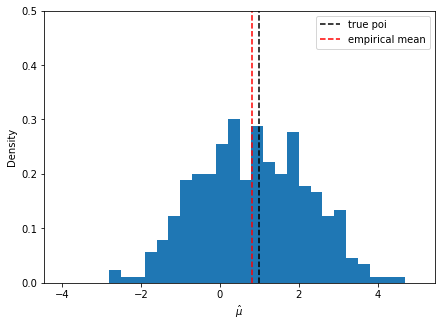

In [19]:
muhat = pars[:, model.config.poi_index]
muhat_sigma = np.std(muhat)


fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

ax.set_xlabel(r"$\hat{\mu}$")
ax.set_ylabel("Density")
ax.set_ylim(top=0.5)

ax.hist(muhat, bins=np.linspace(-4, 5, 31), density=True)
ax.axvline(true_poi, label="true poi", color="black", linestyle="dashed")
ax.axvline(np.mean(muhat), label="empirical mean", color="red", linestyle="dashed")
ax.legend();

Now we calculate the value of our test statistic, both with toys (`qmu_tilde`) and in the asymptotic approximation, for a test value of $\mu$ of 1 (equal to the true value we have generated toys with)

In [24]:
test_poi = 1.0

qmu_tilde = np.asarray(
    [
        pyhf.infer.test_statistics.qmu_tilde(
            test_poi,
            toy,
            model,
            init_pars=model.config.suggested_init(),
            par_bounds=bounded_bounds,fixed_params=fixed_params
        )
        for toy in toys
    ]
)


def tmu_asymp(mutest, muhat, sigma):
    return (mutest - muhat) ** 2 / sigma ** 2


def tmu_tilde_asymp(mutest, muhat, sigma):
    a = tmu_asymp(mutest, muhat, sigma)
    b = tmu_asymp(mutest, muhat, sigma) - tmu_asymp(0.0, muhat, sigma)
    return np.where(muhat > 0, a, b)


def qmu_asymp(mutest, muhat, sigma):
    return np.where(
        muhat < mutest, tmu_asymp(mutest, muhat, sigma), np.zeros_like(muhat)
    )


def qmu_tilde_asymp(mutest, muhat, sigma):
    return np.where(
        muhat < mutest, tmu_tilde_asymp(mutest, muhat, sigma), np.zeros_like(muhat)
    )


We can finally plot our test statistic, both with toys and in the asymptotic case

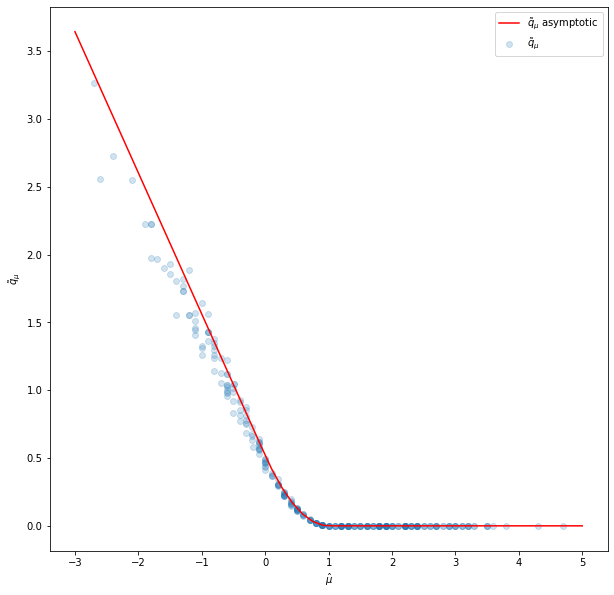

In [25]:
muhat_asymp = np.linspace(-3, 5)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 10)

label = "$\\tilde{q}_{\\mu}$"
data = (qmu_tilde, qmu_tilde_asymp)

empirical, asymp_func = data
ax.scatter(muhat, empirical, alpha=0.2, label=label)
ax.plot(
    muhat_asymp,
    asymp_func(1.0, muhat_asymp, muhat_sigma),
    label=f"{label} asymptotic",
    c="r",
)
ax.set_xlabel(r"$\hat{\mu}$")
ax.set_ylabel(f"{label}")
ax.legend(loc="best")



Now let' calculate upper limits for one setting of our data.

We will compute the $CL_s$ test statistic for various value of the parameter $\mu$

/home/junzi/.local/lib/python3.8/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


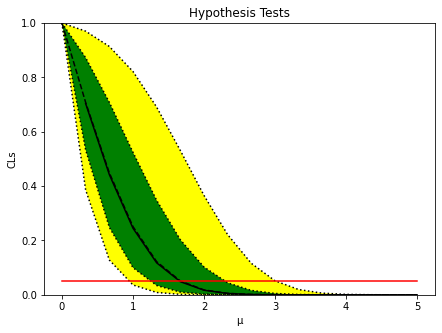

In [26]:

import pyhf.contrib.viz.brazil
mu_tests = np.linspace(0, 5,16)
hypo_tests = [
    pyhf.infer.hypotest(
        mu,
        [51, 48] + pdf.config.auxdata,
        pdf,
        test_stat="qtilde", return_expected_set=True,
    )
    for mu in mu_tests
]

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 5)

ax1.set_title("Hypothesis Tests")
ax1.set_ylabel("CLs")
ax1.set_xlabel("µ")

pyhf.contrib.viz.brazil.plot_results(mu_tests, hypo_tests);


And now we compute the 95\% CL upper limit as the crossing of our $CL_s$ test statistic with our chosen significance $\alpha=1-CL = 0.05$ (the red line in the plot above)

In [52]:
def invert_interval(test_mus, hypo_tests, test_size=0.05):
    cls_obs = np.array([test[0] for test in hypo_tests]).flatten()
    cls_exp = [
        np.array([test[1][i] for test in hypo_tests]).flatten() for i in range(5)
    ]
    crossing_test_stats = {"exp": [], "obs": None}
    for cls_exp_sigma in cls_exp:
        crossing_test_stats["exp"].append(
            np.interp(
                test_size, list(reversed(cls_exp_sigma)), list(reversed(test_mus))
            )
        )
    crossing_test_stats["obs"] = np.interp(
        test_size, list(reversed(cls_obs)), list(reversed(test_mus))
    )
    return crossing_test_stats



results = invert_interval(mu_tests, hypo_tests)

print('Observed Limit: {:.2f}'.format(results['obs']))
print('-----')
for i, n_sigma in enumerate(np.arange(-2, 3)):
    print(
        'Expected Limit{}: {:.3f}'.format(
            '' if n_sigma == 0 else f'({n_sigma} σ)', results['exp'][i]
        )
    )

Observed Limit: 1.66
-----
Expected Limit(-2 σ): 0.950
Expected Limit(-1 σ): 1.254
Expected Limit: 1.676
Expected Limit(1 σ): 2.300
Expected Limit(2 σ): 3.016


**Returning the test statistics for the observed and Asimov data**

In [38]:
CLs_obs, test_statistics = pyhf.infer.hypotest(1.0, [51, 48] + pdf.config.auxdata, pdf, test_stat="qtilde", return_expected_set=True)
print('q_mu: {}, Asimov q_mu: {}'.format(test_statistics[0], test_statistics[1]))

q_mu: [1.38316876], Asimov q_mu: [1.31798997]
